# Dermnet Data Load

In [1]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !pwd

In [2]:
# !kaggle datasets download -d shubhamgoel27/dermnet

In [3]:
# !unzip dermnet.zip -d dermnet

In [4]:
# !ls dermnet/train

# Imports

In [5]:
# %pip install pandas
# %pip install matplotlib
# %pip install opencv-python-headless
# %pip install scikit-image
# %pip install basic-image-eda
# %pip install seaborn

In [6]:
import os
import glob

import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mp_image
import seaborn as sns

from IPython.display import Image, display

# EDA

In [7]:
DIR = 'dermnet'
DIR_TRAIN = f'{DIR}/train/'
DIR_TEST = f'{DIR}/test/'

classes = os.listdir(DIR_TRAIN)
print(f'Total classes: {len(classes)}')

# total train and test images
train_count = 0
test_count = 0

classes_df = []
for _class in classes:
    class_dict = {}
    train_count += len(os.listdir(DIR_TRAIN + _class))
    test_count += len(os.listdir(DIR_TEST + _class))
    class_dict.update({'Class': _class, 
                       'Train': len(os.listdir(DIR_TRAIN + _class)), 
                       'Test': len(os.listdir(DIR_TEST + _class)) })
    classes_df.append(class_dict)

print(f'Total num train images: {train_count}')
print(f'Total num test images: {test_count}')
print(pd.DataFrame(classes_df))

Total classes: 23
Total num train images: 15557
Total num test images: 4003
                                                Class  Train  Test
0                            Atopic Dermatitis Photos    489   123
1                        Exanthems and Drug Eruptions    404   101
2          Lupus and other Connective Tissue diseases    420   105
3   Psoriasis pictures Lichen Planus and related d...   1405   352
4   Tinea Ringworm Candidiasis and other Fungal In...   1300   325
5          Warts Molluscum and other Viral Infections   1086   272
6                              Bullous Disease Photos    448   113
7   Hair Loss Photos Alopecia and other Hair Diseases    239    60
8                 Melanoma Skin Cancer Nevi and Moles    463   116
9   Scabies Lyme Disease and other Infestations an...    431   108
10                                    Urticaria Hives    212    53
11                            Acne and Rosacea Photos    840   313
12  Cellulitis Impetigo and other Bacterial Infect...

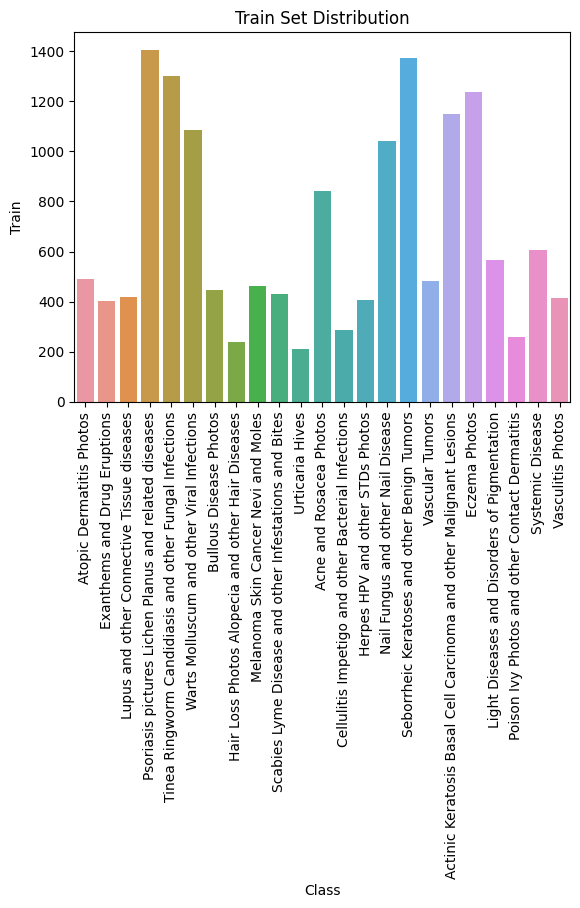

In [8]:
sns.barplot(data=pd.DataFrame(classes_df), 
            x='Class', y='Train').set_title('Train Set Distribution')
plt.xticks(rotation=90);

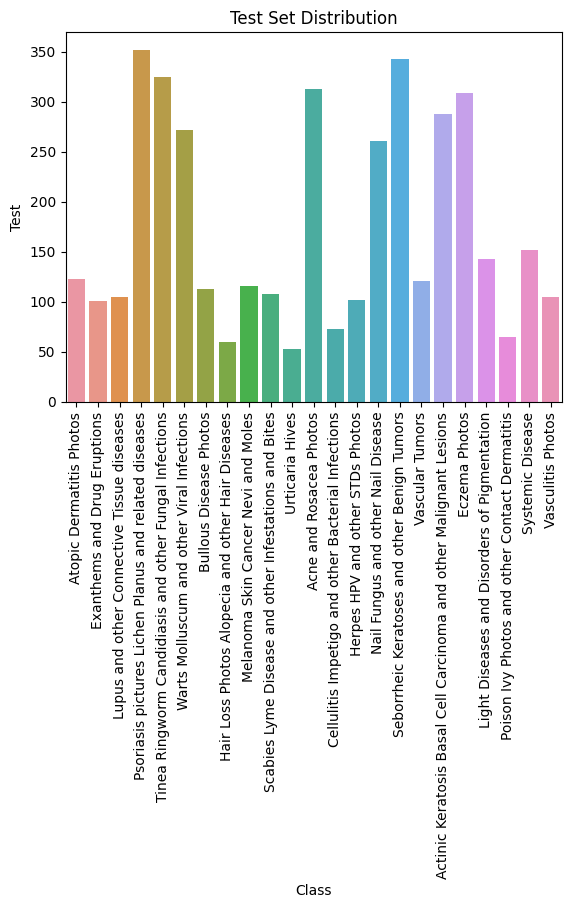

In [9]:
sns.barplot(data=pd.DataFrame(classes_df), 
            x='Class', y='Test').set_title('Test Set Distribution')
plt.xticks(rotation=90);

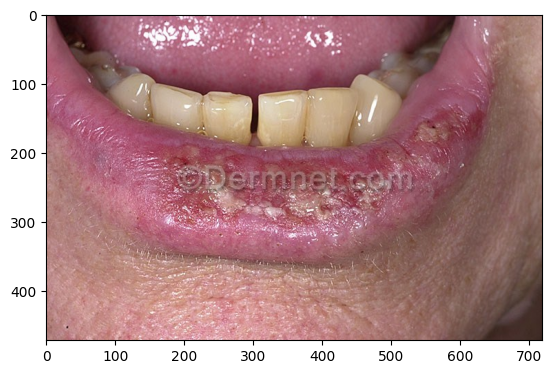

In [10]:
root = 'dermnet/train'
folder = 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'

file_name = os.listdir(os.path.join(root, folder))[5]
file_path = os.path.join(root, folder, file_name)
image = mp_image.imread(file_path)
image_plot = plt.imshow(image)
image_plot;

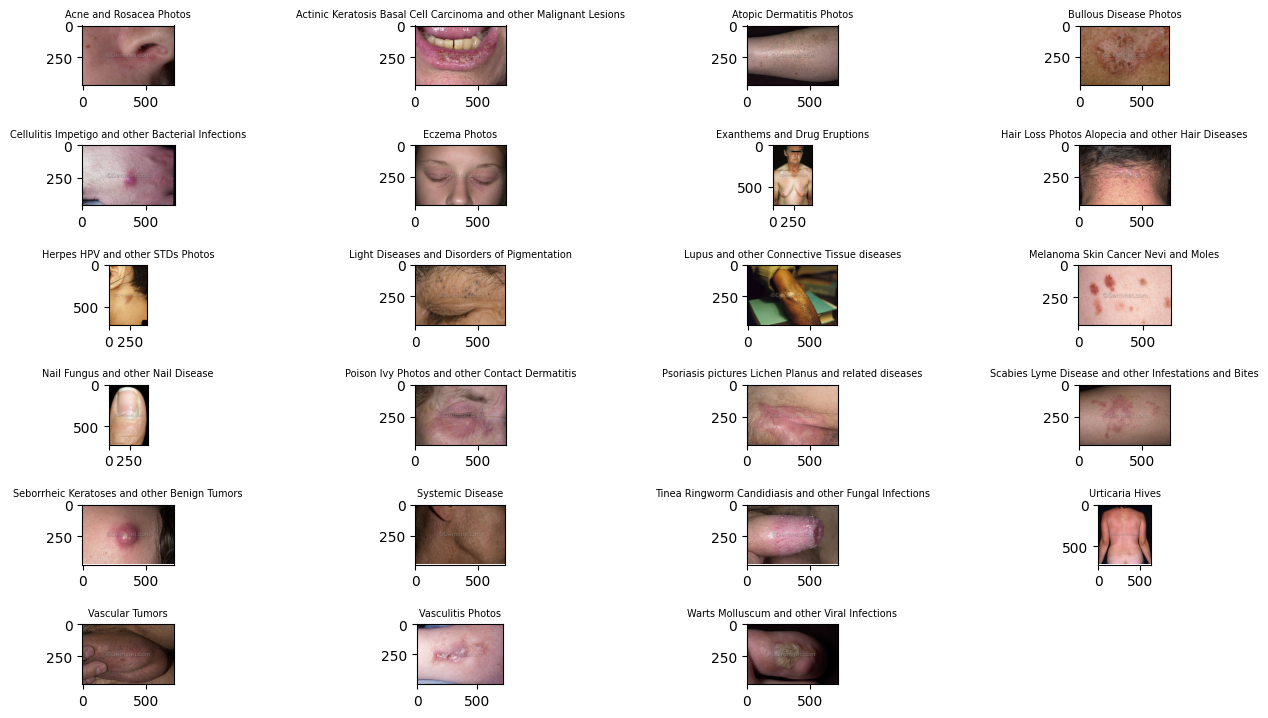

In [11]:
fig = plt.figure(figsize=(15, 35))

# loop through the subfolders
for root, folders, filenames in os.walk(DIR_TRAIN):
    image_num = 0
    num_folders = len(folders)
    for folder in sorted(folders):
        image_num +=1
        file_name = os.listdir(os.path.join(root,folder))[5] # 6th image for each folder
        file_path = os.path.join(root,folder, file_name)
        image = mp_image.imread(file_path)
        a = fig.add_subplot(num_folders, 4, image_num)
        image_plot = plt.imshow(image)
        a.set_title(folder, fontdict={'fontsize':7})
        
fig.subplots_adjust(hspace=1, wspace=1);

# Basic Information of Images (Size, Channel & etc.)


found 15557 images.
Using 4 threads. (max:4)



100%|██████████| 15557/15557 [06:28<00:00, 40.07it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  15557

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  359
max height                               |  1128
mean height                              |  544.4372308285659
median height                            |  480

min width                                |  314
max width                                |  720
mean width                               |  658.5853313620878
median width                             |  720

mean height/width ratio                  |  0.8266768251618352
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [544 656] (h x w, multiples of 8)
recommended input size(by mean)          |  [544 656] (h x w, multiples of 16)
recommende

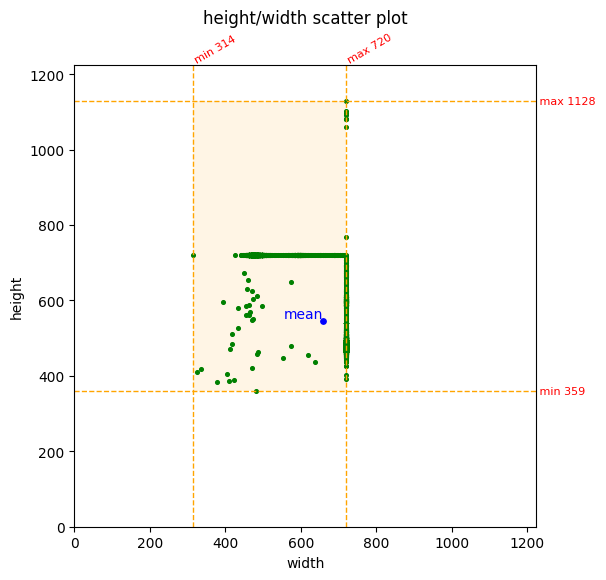

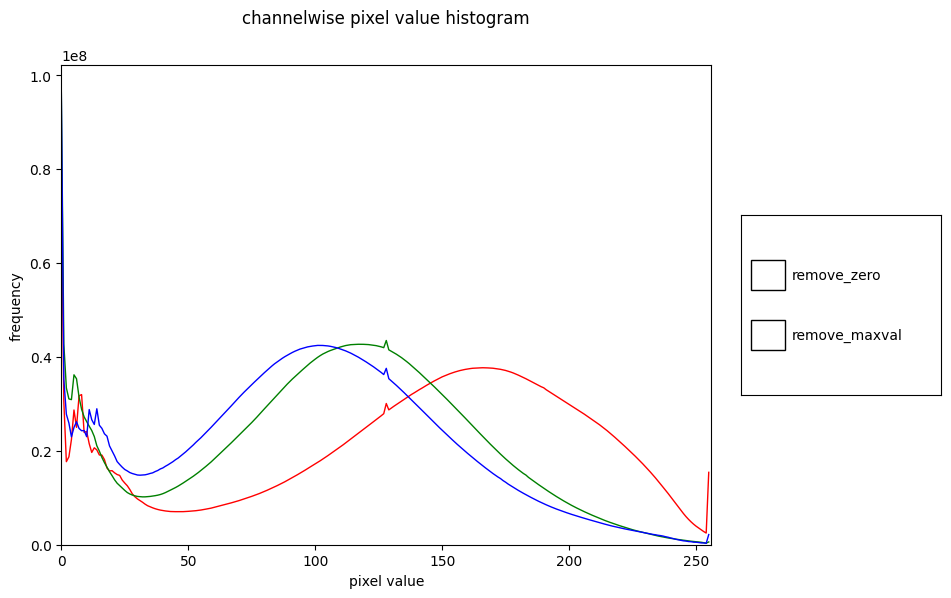

In [12]:
# credits: https://github.com/Soongja/basic-image-eda
from basic_image_eda import BasicImageEDA

if __name__ == "__main__":  # for multiprocessing
    data_dir = DIR_TRAIN
    # BasicImageEDA.explore(data_dir)
        
    # or
    
    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0
    
    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

# Generate Average Image

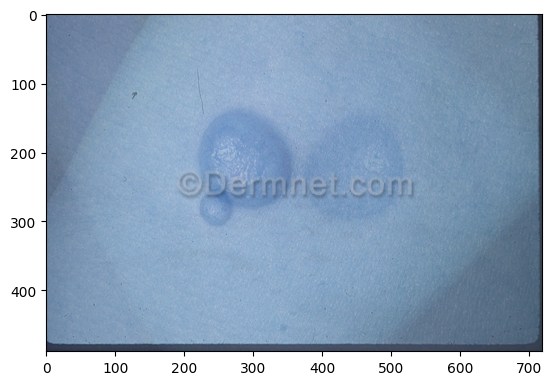

In [13]:
# credits: https://leslietj.github.io/2020/06/28/How-to-Average-Images-Using-OpenCV/

# import all image files with the .jpg extension
images = glob.glob(f'{DIR_TRAIN}Melanoma Skin Cancer Nevi and Moles/*.jpg')

image_data = []
for img in images:
    this_image = cv2.imread(img, 1)
    image_data.append(this_image)

avg_image = image_data[0]
for i in range(len(image_data)):
    if i == 0:
        pass
    else:
        dim = (avg_image.shape[1], avg_image.shape[0])
        resized = cv2.resize(image_data[i], dim)
        avg_image = cv2.addWeighted(resized, 0.3, avg_image, 0.7, 0.0)

img_name = 'images/avg_melanoma_dermnet.png'
cv2.imwrite(img_name, avg_image)
avg_image = cv2.imread(img_name)
plt.imshow(avg_image)
plt.show()

In [14]:
avg_image.shape

(489, 720, 3)